In [110]:
import numpy as np
from matplotlib import pyplot as plt
import math


In [111]:
eps=1
k=1
sigma=1
mass=1

In [112]:
class MD_Simulations:
    def __init__(self,dim,num_particles,Temp,box_len,dt,steps):
        self.dim = dim
        self.num_particles = num_particles
        self.T = Temp
        self.box_len =box_len
        self.dt = dt
        self.steps =steps
        self.positions = np.random.rand(self.num_particles, self.dim) * self.box_len
        self.velocities = np.random.randn(self.num_particles, self.dim)
        self.a = np.zeros((self.num_particles, self.dim))
        self.t = 0

    def plot_particles(self):
        plt.figure(figsize=(6,6))
        axis = plt.gca()       
        axis.set_xlim(-1,self.box_len+1)
        axis.set_ylim(-1,self.box_len+1)

        for i in range(self.num_particles):
            axis.add_patch( plt.Circle(self.positions[i], radius=0.15, 
                                                   linewidth=2) )
        plt.show()
        
    def rvector(self):
        r = self.positions[:, np.newaxis, :] - self.positions[np.newaxis, :, :]
        r -= self.box_len * np.round(r / self.box_len)
        mask = np.arange(self.num_particles)[:, None] != np.arange(self.num_particles)  #really two particle distance
        return r[mask].reshape(self.num_particles, self.num_particles - 1, 2)

    def rsquare(self):
        r = self.rvector()
        return np.sum(r**2, axis=-1)

    def accel(self):
        r = self.rvector()
        r2 = self.rsquare()
        r2_inv = r2+1e-6     # gives non zero value, better way should be established here
        r2_inv6 = r2_inv**3
        r2_inv12 = r2_inv6**2
        f = 24 *eps* (2 * 1.0/r2_inv12 - 1.0/r2_inv6)/r2_inv
        a = np.sum(f[..., np.newaxis] * r, axis=1)
        return a
        
    def verlet_step(self,final_t):
        for i in range(1, final_t):
            self.positions += self.velocities * self.dt + 0.5 * self.a * self.dt**2
            self.positions = self.positions % self.box_len
            a_new = self.accel()
            self.velocities += self.a * self.dt
            self.t += self.dt
        return self.positions,self.velocities
        
    def Temperature_check(self):
        Ekin=self.Ekin()
        return 2 * Ekin / (2.0*self.num_particles -2.0)

    def Ekin(self):
        return 0.5 *np.sum(self.velocities**2)


In [118]:
md_obj = MD_Simulations(2,100,10,10,0.001,100)   # still no effect of T, Termostat?

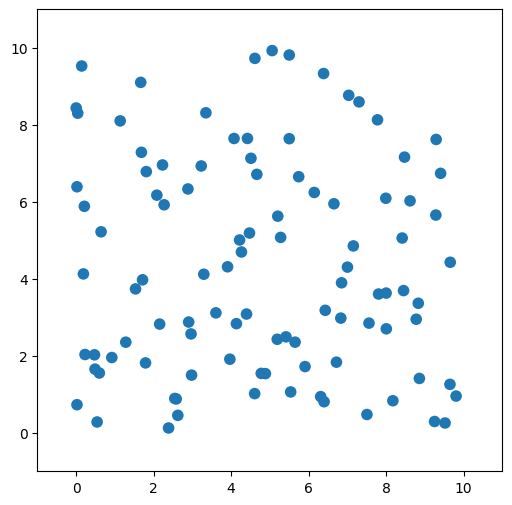

In [114]:
md_obj.plot_particles()

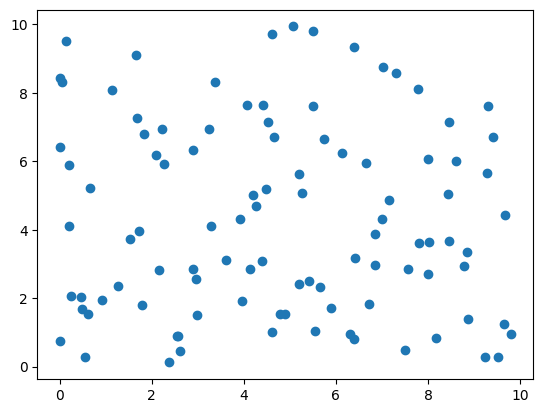

In [115]:
rrr,vvvv=md_obj.verlet_step(10)
plt.plot(rrr[:,0],rrr[:,1],"o")
plt.show()

In [116]:
md_obj.Temperature_check()

0.9510981021466712

In [117]:
EK=md_obj.Ekin()
print(EK)

94.15871211252045
